<a href="https://colab.research.google.com/github/kelly870114/git_class/blob/master/Iloveyou%3C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step a
Download MNIST digit dataset (60,000 training and 10,000 testing data points) and the starter code from the course page. Each row in the matrix represents a handwritten digit image. The starter code shows how to visualize an example data point in Matlab. The task is to predict the class (0 to 9) for a given test image, so it is a 10-way classification problem.

In [ ]:
!curl --output MNIST_digit_data.mat https://web.cs.ucdavis.edu/~hpirsiav/courses/MLw22/hw/hw1/MNIST_digit_data.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.1M  100 33.1M    0     0  39.7M      0 --:--:-- --:--:-- --:--:-- 39.7M


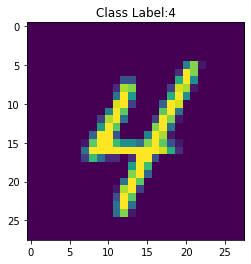

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds] # (60000, 784) 
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

# if you want to use only the first 1000 data points.
images_train_1k = images_train[0:1000,:]
labels_train_1k = labels_train[0:1000,:]


#show the 10'th train image
i=10
im = images_train_1k[i,:].reshape((28,28),order='F') # (1, 784) -> (28, 28)
plt.imshow(im)
plt.title('Class Label:'+str(labels_train_1k[i][0]))
plt.show()


## Step B
Write a Matlab or Python function that implements kNN for this task and reports the accuracy for each class (10 numbers) as well as the average accuracy (one number).

[acc acc av] = kNN(images train, labels train, images test, labels test, k)

where acc is a vector of length 10 and acc av is a scalar. Look at a few correct and wrong predictions to see if it makes sense. To speed it up, in all experiments, you may use only the first 1000 testing images.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(images_train_1k, labels_train_1k) # using training data to fit model, model will know the labels in data

pred = knn.predict(images_test) # predict using test data

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(len(pred), pred)
print(len(labels_test), labels_test)

cnt = 0
for ind, i in enumerate(labels_test):
    if pred[ind] == i:
        cnt += 1

print("Average accracy: ", cnt/len(pred))

print('-'*50)
print('or use this way')

# Average
avg_acc = knn.score(images_test, labels_test)
print(avg_acc)

10000 [4 8 3 ... 9 9 6]
10000 [[4]
 [8]
 [5]
 ...
 [9]
 [9]
 [6]]
Average accracy:  0.8834
--------------------------------------------------
or use this way
0.8834


In [ ]:
map={}

for ind, i in enumerate(labels_test.tolist()):
  i = i[0]
  if i not in map:
    if pred[ind] == i:
      map[i] = [1,1]
    else:
      map[i] = [0,1]
  
  else:
    if pred[ind] == i:
      map[i][0] += 1
      map[i][1] += 1
    else:
      map[i][1] += 1

for i in map:
    map[i] = map[i][0]/map[i][1]

print(map)
print(sorted(map.items(), key=lambda x: x[0]))

{4: 0.8513238289205702, 8: 0.7679671457905544, 5: 0.7948430493273543, 9: 0.88800792864222, 0: 0.9714285714285714, 1: 0.9964757709251101, 3: 0.8831683168316832, 7: 0.8764591439688716, 6: 0.9498956158663883, 2: 0.8323643410852714}
[(0, 0.9714285714285714), (1, 0.9964757709251101), (2, 0.8323643410852714), (3, 0.8831683168316832), (4, 0.8513238289205702), (5, 0.7948430493273543), (6, 0.9498956158663883), (7, 0.8764591439688716), (8, 0.7679671457905544), (9, 0.88800792864222)]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.79      1.00      0.88      1135
           2       0.96      0.83      0.89      1032
           3       0.86      0.88      0.87      1010
           4       0.89      0.85      0.87       982
           5       0.87      0.79      0.83       892
           6       0.93      0.95      0.94       958
           7       0.92      0.88      0.90      1028
           8       0.95      0.77      0.85       974
           9       0.83      0.89      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



## Step C
For k = 1, change the number of training data points (30 to 10,000) to see the change in perfor- mance. Plot the average accuracy for 10 different dataset sizes. You may use command logspace in Matlab. In the plot, x-axis is for the number of training data and y-axis is for the accuracy.

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors=1) # KNN, k=1

size_var = [30, 100, 500, 1000, 2500, 4000, 6000, 8000, 9000, 10000]
pred_dict = {}

for i in size_var:
    images_train_var = images_train[:i]
    labels_train_var = labels_train[:i]

    knn_1.fit(images_train_var, labels_train_var) # using training data to fit model, model will know the labels in data
    pred = knn_1.predict(images_test) # predict using test data

    acc = knn_1.score(images_test, labels_test)

    pred_dict[i] = acc

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

TypeError: ignored

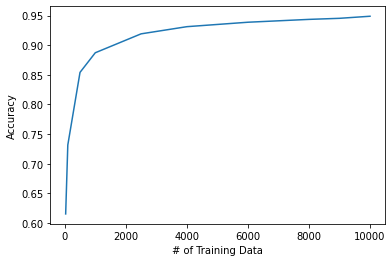

In [ ]:
plt.plot(list(pred_dict.keys()), list(pred_dict.values()))
plt.ylabel("Accuracy") # y label
plt.xlabel("# of Training Data") # x label
plt.show()

## Step d
Show the effect of k on the accuracy. Make a plot similar to the above one with multiple colored curves on the top of each other (each for a particular k in [1 2 3 5 10].) You may use command legend in Matlab to name different colors.

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

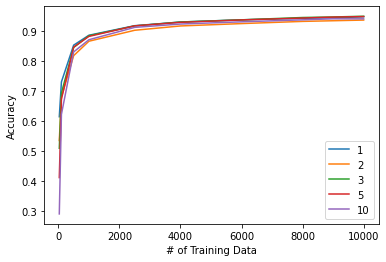

matrics:  [[0.6154, 0.7317, 0.8542, 0.8873, 0.9192, 0.9313, 0.9388, 0.9436, 0.9454, 0.9489], [0.5361, 0.6812, 0.8191, 0.8673, 0.9039, 0.9183, 0.9262, 0.9335, 0.9357, 0.9379], [0.5102, 0.6948, 0.8466, 0.8857, 0.9183, 0.9315, 0.9387, 0.9465, 0.9483, 0.9507], [0.4123, 0.6742, 0.8476, 0.8834, 0.9186, 0.9304, 0.9384, 0.9447, 0.9479, 0.9496], [0.2911, 0.6234, 0.8316, 0.8723, 0.9136, 0.9247, 0.9321, 0.9387, 0.9422, 0.942]]


In [ ]:
def model_k(size_var, k):
    knn = KNeighborsClassifier(n_neighbors=k) # KNN, k=1

    
    pred_list = []

    for ind, i in enumerate(size_var):
        images_train_var = images_train[:i]
        labels_train_var = labels_train[:i]

        knn.fit(images_train_var, labels_train_var) # using training data to fit model, model will know the labels in data
        pred = knn.predict(images_test) # predict using test data

        acc = knn.score(images_test, labels_test)

        pred_list.insert(ind, acc)

    return pred_list

size_var = [30, 100, 500, 1000, 2500, 4000, 6000, 8000, 9000, 10000]

k_list = [1, 2, 3, 5, 10]
pr_metrics = []
for i in k_list:
    pr_lt = model_k(size_var, i)
    plt.plot(size_var, pr_lt, label=i)
    pr_metrics.append(pr_lt)
plt.ylabel("Accuracy") # y label
plt.xlabel("# of Training Data") # x label
plt.legend()
plt.show()

print('matrics: ', pr_metrics)

## Step e
Choose the best k for 2,000 total training data by splitting the training data into two halves (the first for training and the second for validation). You may plot the average accuracy wrt k for this. Note that in this part, you should not use the test data. You may search for k in this list: [1 2 3 5 10].

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

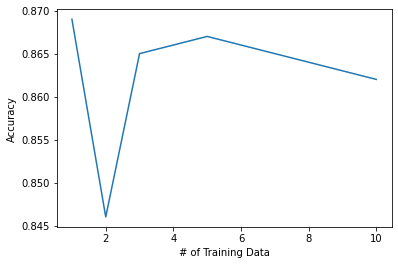

The best k is  1 , and accuracy is  0.869


In [ ]:
images_train_2k = images_train[:2000]
labels_train_2k = labels_train[:2000]

images_train_tra = images_train_2k[:1000]
images_train_val = images_train_2k[1000:]
labels_train_tra = labels_train_2k[:1000]
labels_train_val = labels_train_2k[1000:]

k_list = [1, 2, 3, 5, 10]

def model_k_e(k):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(images_train_tra, labels_train_tra) # using training data to fit model, model will know the labels in data
    pred = knn.predict(images_train_val) # predict using test data

    acc = knn.score(images_train_val, labels_train_val)

    return acc

acc_e = [model_k_e(i) for i in k_list]

plt.plot(k_list, acc_e)

plt.ylabel("Accuracy") # y label
plt.xlabel("# of Training Data") # x label
# plt.legend()
plt.show()

print('The best k is ', k_list[acc_e.index(max(acc_e))], ', and accuracy is ', max(acc_e))
